# Data Exploration and Cleanup

## Add the total field to the Venue

Because of the structure of the data, the combined season had a parameter of null when scraping from the web.
This value was filled with total to be more accurate.

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the DF and display the info
NBA_Data=pd.read_csv("./Potential Data Sets/NBA Free Throw Data.csv")
NBA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 16 columns):
Team            630 non-null object
Season          630 non-null object
Venue           420 non-null object
Wins            630 non-null int64
Loss            630 non-null int64
Win%            630 non-null float64
FT Made         630 non-null int64
FT Att          630 non-null int64
FT%             630 non-null float64
Win Rnk         630 non-null int64
Loss Rnk        630 non-null int64
Win% Rnk        630 non-null int64
FT Made Rnk     630 non-null int64
FT ATT Rnk      630 non-null int64
FT% Rnk         630 non-null int64
Total Points    630 non-null int64
dtypes: float64(2), int64(11), object(3)
memory usage: 78.8+ KB


In [173]:
# Fill the null values with the word Total as the null values are both the home and away games.
NBA_Data["Venue"].fillna('Total',inplace = True)

#display the df info
NBA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 16 columns):
Team            630 non-null object
Season          630 non-null object
Venue           630 non-null object
Wins            630 non-null int64
Loss            630 non-null int64
Win%            630 non-null float64
FT Made         630 non-null int64
FT Att          630 non-null int64
FT%             630 non-null float64
Win Rnk         630 non-null int64
Loss Rnk        630 non-null int64
Win% Rnk        630 non-null int64
FT Made Rnk     630 non-null int64
FT ATT Rnk      630 non-null int64
FT% Rnk         630 non-null int64
Total Points    630 non-null int64
dtypes: float64(2), int64(11), object(3)
memory usage: 78.8+ KB


## Team Name Repeats

Some teams changed names and some teams had typos.

Charlotte Bobcats became Charlotte Hornets.

New Orleans Hornets became the New Orleans Pelicans.

Los Angeles Clippers became LA Clippers.

In [174]:
# Display the team name repeats
print(NBA_Data["Team"].nunique())
print(NBA_Data["Team"].unique())

33
['Atlanta Hawks' 'Boston Celtics' 'Brooklyn Nets' 'Charlotte Bobcats'
 'Chicago Bulls' 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'Los Angeles Clippers' 'Los Angeles Lakers'
 'Memphis Grizzlies' 'Miami Heat' 'Milwaukee Bucks'
 'Minnesota Timberwolves' 'New Orleans Hornets' 'New York Knicks'
 'Oklahoma City Thunder' 'Orlando Magic' 'Philadelphia 76ers'
 'Phoenix Suns' 'Portland Trail Blazers' 'Sacramento Kings'
 'San Antonio Spurs' 'Toronto Raptors' 'Utah Jazz' 'Washington Wizards'
 'New Orleans Pelicans' 'Charlotte Hornets' 'LA Clippers']


In [175]:
# Replace the team names and display the changed data frame.
NBA_Data["Team"].replace("Los Angeles Clippers","LA Clippers", inplace=True)
NBA_Data["Team"].replace("Charlotte Bobcats","Charlotte Hornets" ,inplace=True)
NBA_Data["Team"].replace("New Orleans Hornets" ,"New Orleans Pelicans", inplace=True)
print(NBA_Data["Team"].nunique())
print(NBA_Data["Team"].unique())

30
['Atlanta Hawks' 'Boston Celtics' 'Brooklyn Nets' 'Charlotte Hornets'
 'Chicago Bulls' 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'LA Clippers' 'Los Angeles Lakers' 'Memphis Grizzlies'
 'Miami Heat' 'Milwaukee Bucks' 'Minnesota Timberwolves'
 'New Orleans Pelicans' 'New York Knicks' 'Oklahoma City Thunder'
 'Orlando Magic' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'San Antonio Spurs'
 'Toronto Raptors' 'Utah Jazz' 'Washington Wizards']


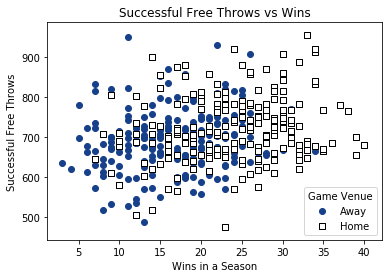

In [176]:
# Create 3 dataframes for home away and total
# This allows us to compare all of it.

away=NBA_Data.loc[NBA_Data["Venue"] == "Road"]
home=NBA_Data.loc[NBA_Data["Venue"] == "Home"]
total=NBA_Data.loc[NBA_Data["Venue"] == "Total"]


# Plot the home and away games on a scatter plot to look for correlations
plt.scatter(away["Wins"],away["FT Made"], marker="o", color="#17408B")
plt.scatter(home["Wins"],home["FT Made"], marker="s", edgecolors="black", color="#FFFFFF")

plt.xlabel("Wins in a Season")
plt.ylabel("Successful Free Throws")
plt.title("Successful Free Throws vs Wins")
# Create a legend
lgnd = plt.legend(labels=["Away","Home"],numpoints=1,title="Game Venue", loc="lower right")
plt.savefig("home_away.png")
plt.show()

## Looking for Wins

This next section plots to check for a relationship between the 3 free throw values and wins.

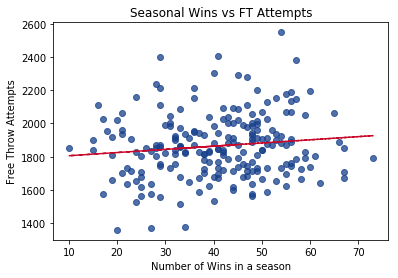

In [177]:
# Define x and y and plot the graph
x=total["Wins"]
y=total["FT Att"]
plt.scatter(x,y, color="#17408B", alpha=.75 )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Number of Wins in a season")
plt.ylabel("Free Throw Attempts")
plt.title("Seasonal Wins vs FT Attempts")

#Save and plot the figure
plt.savefig("Wins_vs_Att.png")
plt.show()

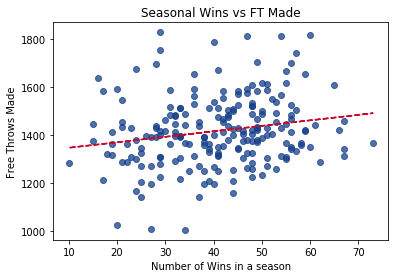

In [178]:
# Define x and y and plot the graph
x=total["Wins"]
y=total["FT Made"]
plt.scatter(x,y, color="#17408B", alpha=.75 )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Number of Wins in a season")
plt.ylabel("Free Throws Made")
plt.title("Seasonal Wins vs FT Made")

#Save and plot the figure
plt.savefig("Wins_vs_Made.png")
plt.show()

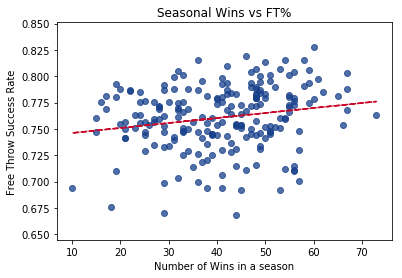

In [179]:
# Define x and y and plot the graph
x=total["Wins"]
y=total["FT%"]
plt.scatter(x,y, color="#17408B", alpha=.75 )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Number of Wins in a season")
plt.ylabel("Free Throw Success Rate")
plt.title("Seasonal Wins vs FT%")

#Save and plot the figure
plt.savefig("Wins_vs_FT%.png")
plt.show()

## This next group of plots is explores the correlation between win rankings and Free throws

The concept behind this is if they teams are grouped by win rank, then the data will not necessarily follow teams, but and abstracted ranking of those teams for each year.

It then looks for correlations between the average of the different free throw stats for each rank

In [180]:
# Group by win rank and display the DF
Win_Rank=total.groupby("Win Rnk").mean()
Win_Rank.head()

,Wins,Loss,Win%,FT Made,FT Att,FT%,Loss Rnk,Win% Rnk,FT Made Rnk,FT ATT Rnk,FT% Rnk,Total Points
Win Rnk,,,,,,,,,,,,
1,65.571429,16.000000,0.803571,1410.428571,1823.857143,0.773429,1.000,1.0,16.571429,18.142857,11.285714,9079.285714
2,60.285714,21.428571,0.737857,1491.285714,1858.571429,0.801429,2.000,2.0,13.142857,17.142857,3.571429,8744.714286
3,56.500000,25.125000,0.692125,1469.875000,1944.875000,0.759500,2.875,3.0,12.500000,13.000000,16.375000,8897.250000
4,55.000000,26.500000,0.674833,1465.666667,1916.666667,0.765833,4.000,4.0,13.333333,13.833333,14.666667,8534.166667
5,53.357143,28.500000,0.652000,1494.357143,1961.071429,0.763143,5.000,5.0,10.857143,11.071429,15.357143,8609.642857


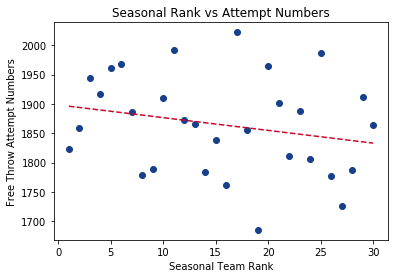

In [181]:
# Define x and y and plot the graph
x=Win_Rank.index
y=Win_Rank["FT Att"]
plt.scatter(x,y, color="#17408B" )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Seasonal Team Rank")
plt.ylabel("Free Throw Attempt Numbers")
plt.title("Seasonal Rank vs Attempt Numbers")

#Save and plot the figure
plt.savefig("WRank_vs_Att.png")
plt.show()

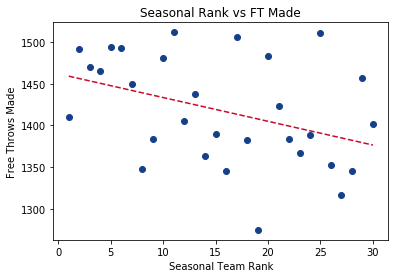

In [182]:
# Define x and y and plot the graph
x=Win_Rank.index
y=Win_Rank["FT Made"]
plt.scatter(x,y, color="#17408B" )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Seasonal Team Rank")
plt.ylabel("Free Throws Made")
plt.title("Seasonal Rank vs FT Made")

#Save and plot the figure
plt.savefig("WRank_vs_Made.png")
plt.show()

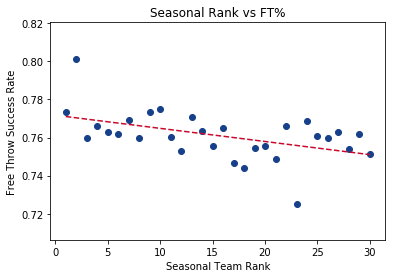

In [183]:
# Define x and y and plot the graph
x=Win_Rank.index
y=Win_Rank["FT%"]
plt.scatter(x,y, color="#17408B" )

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), linestyle="--" ,color="#C9082A" )

#Label the graph
plt.xlabel("Seasonal Team Rank")
plt.ylabel("Free Throw Success Rate")
plt.title("Seasonal Rank vs FT%")

#Save and plot the figure
plt.savefig("WRank_vs_FT%.png")
plt.show()

# Outside the Norm

This next section is about breaking down which stats contributes more to wins in a season.

It calculates the mean and standard deviation for the combined home and away games.

After that, it finds the teams that were outside of that on both sides.

Then, it compares the average of those populations with the average of the total population.

This is imporant because these relationships may not be linear and if we want to be best (or worst), then we'll want to see which factor contributes most on the edges.

In [184]:
# Find the mean and standard deviation for FT Attemtps, FT Made, FT%, and Calculate average wins.
mean_FT_Att_per_season=total["FT Att"].mean()
stdev_FT_Per_season=total["FT Att"].std()
mean_FT_Made_per_season=total["FT Made"].mean()
stdev_FT_Made_season=total["FT Made"].std()
mean_FT_pct_per_season=total["FT%"].mean()
stdev_FT_pct_per_season=total["FT%"].std()
Average_wins=total["Wins"].mean()

#Find the average wins of the groups that are greater than 1 standard deviation from average
top_attempts=total.loc[total["FT Att"]>=(mean_FT_Att_per_season+stdev_FT_Per_season)]
most_shooters=top_attempts["Wins"].mean()
top_made=total.loc[total["FT Made"]>=(mean_FT_Made_per_season+stdev_FT_Made_season)]
most_made=top_made["Wins"].mean()
top_percentages=total.loc[total["FT%"]>=(mean_FT_pct_per_season+stdev_FT_pct_per_season)]
good_shooters=top_percentages["Wins"].mean()

#Find the average wins of the groups that are less than 1 standard deviation from average
bottom_attempts=total.loc[total["FT Att"]<=(mean_FT_Att_per_season-stdev_FT_Per_season)]
least_shooters= bottom_attempts["Wins"].mean()
bottom_made=total.loc[total["FT Made"]<=(mean_FT_Made_per_season-stdev_FT_Made_season)]
least_made=bottom_made["Wins"].mean()
bottom_percentages=total.loc[total["FT%"]<=(mean_FT_pct_per_season-stdev_FT_pct_per_season)]
worst_shooters=bottom_percentages["Wins"].mean()

In [185]:
display_df=pd.DataFrame( {"Attempts" : [most_shooters,least_shooters],
                          "Made": [most_made, least_made],
                          "Percentage": [good_shooters,worst_shooters]
                         } , index=["Best","Worst"])
print(f"Average Wins={Average_wins}")
display_df

Average Wins=40.81428571428572


,Attempts,Made,Percentage
Best,43.937500,43.424242,46.766667
Worst,36.870968,35.724138,39.687500


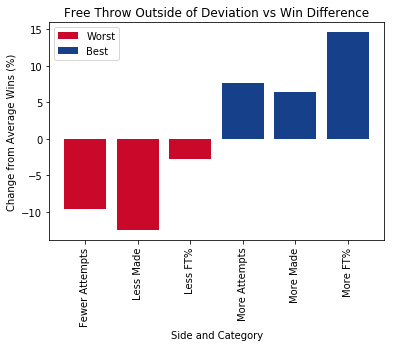

In [186]:
bar1=["Fewer Attempts", "Less Made", "Less FT%" ]
bar2=[ "More Attempts", "More Made", "More FT%"]
worst=[least_shooters, least_made, worst_shooters]
best=[ most_shooters, most_made, good_shooters]
worst_change= [(wins-Average_wins)/Average_wins*100 for wins in worst]
best_change= [(wins-Average_wins)/Average_wins*100 for wins in best]

legend=["Worst","Best"]
plt.bar(bar1, worst_change, color="#C9082A")
plt.bar(bar2, best_change, color="#17408B")
plt.xticks(rotation=90)
plt.xlabel("Side and Category")
plt.ylabel("Change from Average Wins (%)")
plt.title("Free Throw Outside of Deviation vs Win Difference")
plt.legend(legend)
plt.savefig("Outside_Normal.png")
plt.show()